<a href="https://colab.research.google.com/github/skywalkerCam/AlgoritmoDeClustering/blob/main/Oficina07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Gerando o dataset sintético
np.random.seed(0)
n_samples = 300

data = {
    'valor_medio_gasto': np.random.randn(n_samples) * 20 + 200,
    'frequencia_compras': np.random.randn(n_samples) * 5 + 15,
    'categorias_produtos': np.random.randn(n_samples) * 2 + 8
}

df = pd.DataFrame(data)

# Aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=4, random_state=0)  # Escolhemos 4 clusters como exemplo
df['cluster'] = kmeans.fit_predict(df[['valor_medio_gasto', 'frequencia_compras', 'categorias_produtos']])

# Visualizando as primeiras linhas com os clusters atribuídos
df.head()


,valor_medio_gasto,frequencia_compras,categorias_produtos,cluster
0,235.281047,8.467366,4.899141,3
1,208.003144,23.290653,8.834638,1
2,219.574760,14.409180,6.111263,1
3,244.817864,11.599109,8.476206,3
4,237.351160,18.331915,5.188074,3


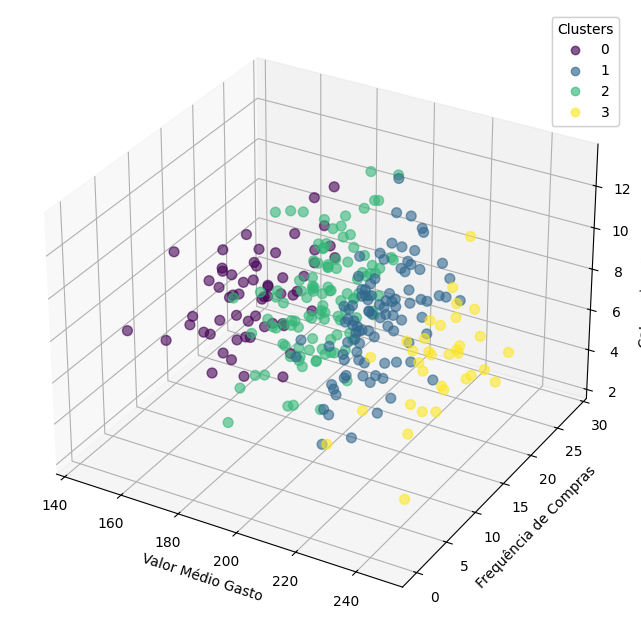

In [ ]:
# Visualizando dos clusters em um gráfico 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['valor_medio_gasto'], df['frequencia_compras'], df['categorias_produtos'],
                     c=df['cluster'], cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Valor Médio Gasto')
ax.set_ylabel('Frequência de Compras')
ax.set_zlabel('Categorias de Produtos')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


**1)Por que esse algoritmo é adequado para o problema apresentado?**
R: O algoritmo K-means é amplamente utilizado em problemas de clustering quando se deseja segmentar dados em grupos distintos com base em características contínuas. Como estamos tentando identificar padrões de compra de clientes, o K-means é uma escolha apropriada, pois ele tenta agrupar clientes que possuem comportamentos de compra semelhantes (com base em valor médio gasto, frequência de compras e número de categorias compradas).

**2)Quais são as vantagens e possíveis limitações do algoritmo escolhido no contexto deste problema?**
R: As principais vantagens do K-means é a simplicidade e rapidez, já que é fácil de implementar e computacionalmente eficiente. Ele funciona bem para grandes datasets, o que é ideal para a loja on-line. Além da boa performance quando os clusters são bem definidos: Como estamos lidando com características de clientes, o K-means é capaz de identificar rapidamente grupos de comportamento de compra semelhante. Suas limitações são o número de clusters pré-determinado: Precisamos definir o número de clusters (4 no caso). A escolha correta do número de clusters pode ser feita usando o método do cotovelo ou validação cruzada. Outra possivel limitação seria q o K-means pode ser afetado por outliers, o que pode distorcer a definição dos clusters.

**3)Como os clusters formados podem ser interpretados para gerar insights para a loja on-line?**
Cluster 1 pode representar clientes com alta frequência de compras e categorias variadas, mas com gasto médio moderado.
Cluster 2 pode representar clientes que gastam mais por compra, compram com frequência e também compram uma variedade de produtos.
Cluster 3 pode ser um grupo com clientes de gasto médio, mas com uma frequência de compra e diversidade de produtos mais moderadas.
Cluster 4 pode representar clientes que gastam menos por compra e têm uma menor variedade de categorias de produtos comprados.
